In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
query_date = date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.prcp, 
                        Measurement.date).\
                  filter(Measurement.date > query_date).all()
prcp_df = pd.DataFrame(results)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = prcp_df.rename(columns={'prcp': 'Precipitation', 'date': 'Date'})


# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('Date', ascending=True).reset_index(drop=True)




prcp_df_sorted


,Precipitation,Date
0,0.08,2016-08-24
1,NaN,2016-08-24
2,2.15,2016-08-24
3,2.28,2016-08-24
4,2.15,2016-08-24
...,...,...
2218,0.00,2017-08-22
2219,0.08,2017-08-23
2220,0.00,2017-08-23
2221,0.00,2017-08-23


Text(0, 0.5, 'Precipitation (inches)')

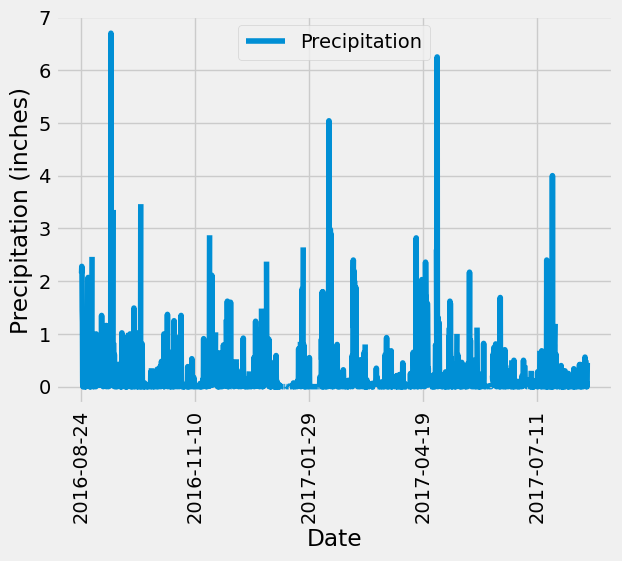

In [83]:
# Plot the data
prcp_df_sorted.plot(x='Date', y='Precipitation', rot=90)
plt.ylabel('Precipitation (inches)')

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = pd.DataFrame(prcp_df_sorted["Precipitation"].describe())
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),  func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()    




[('USC00519281', 54.0, 85.0, 71.66378066378067)]

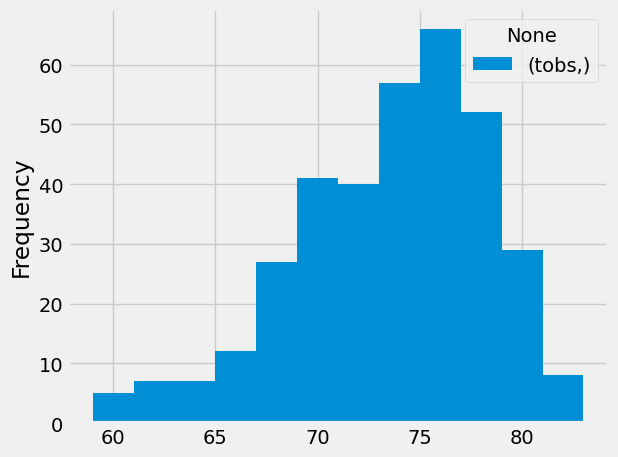

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > query_date).all()

temperatures_df = pd.DataFrame(temperatures, columns=[['tobs']])

temperatures_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()


# Close Session

In [117]:
# Close Session
session.close()